# Visualizing Harpy output in napari

Harpy works with [SpatialData](https://spatialdata.scverse.org/en/stable/) and [AnnData](https://anndata.readthedocs.io/en/latest/) objects. This allows for interoperability with other libraries in the [scverse ecosystem](https://scverse.org/) that also work with these objects. In this notebook, we load an artificial example dataset and perform unsupervised cell type labeling with [FlowSOM in Python](https://flowsom.readthedocs.io/en/latest/). The clustering result can be visualized with [napari-spatialdata](https://github.com/scverse/napari-spatialdata).

In [1]:
%load_ext autoreload
%autoreload 2

from harpy.datasets import multisample_blobs

sdata = multisample_blobs(n_samples=4)
sdata

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]


INFO     no axes information specified in the object, setting `dims` to: ('c', 'y', 'x')                           
INFO     no axes information specified in the object, setting `dims` to: ('y', 'x')                                


/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/spatialdata/models/models.py:1018: UserWarning: Converting `region_key: region` to categorical dtype.
  return convert_region_column_to_categorical(adata)
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/spatialdata/_core/_elements.py:116: UserWarning: Key `sample_0_table` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


INFO     no axes information specified in the object, setting `dims` to: ('c', 'y', 'x')                           
INFO     no axes information specified in the object, setting `dims` to: ('y', 'x')                                


/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/spatialdata/models/models.py:1018: UserWarning: Converting `region_key: region` to categorical dtype.
  return convert_region_column_to_categorical(adata)
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/spatialdata/_core/_elements.py:116: UserWarning: Key `sample_1_table` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


INFO     no axes information specified in the object, setting `dims` to: ('c', 'y', 'x')                           
INFO     no axes information specified in the object, setting `dims` to: ('y', 'x')                                


/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/spatialdata/models/models.py:1018: UserWarning: Converting `region_key: region` to categorical dtype.
  return convert_region_column_to_categorical(adata)
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/spatialdata/_core/_elements.py:116: UserWarning: Key `sample_2_table` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


INFO     no axes information specified in the object, setting `dims` to: ('c', 'y', 'x')                           
INFO     no axes information specified in the object, setting `dims` to: ('y', 'x')                                


/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/spatialdata/models/models.py:1018: UserWarning: Converting `region_key: region` to categorical dtype.
  return convert_region_column_to_categorical(adata)
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/spatialdata/_core/_elements.py:116: UserWarning: Key `sample_3_table` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


SpatialData object
├── Images
│     ├── 'sample_0_image': DataArray[cyx] (11, 512, 512)
│     ├── 'sample_1_image': DataArray[cyx] (11, 512, 512)
│     ├── 'sample_2_image': DataArray[cyx] (11, 512, 512)
│     └── 'sample_3_image': DataArray[cyx] (11, 512, 512)
├── Labels
│     ├── 'sample_0_labels': DataArray[yx] (512, 512)
│     ├── 'sample_1_labels': DataArray[yx] (512, 512)
│     ├── 'sample_2_labels': DataArray[yx] (512, 512)
│     └── 'sample_3_labels': DataArray[yx] (512, 512)
├── Points
│     ├── 'sample_0_points': DataFrame with shape: (<Delayed>, 2) (2D points)
│     ├── 'sample_1_points': DataFrame with shape: (<Delayed>, 2) (2D points)
│     ├── 'sample_2_points': DataFrame with shape: (<Delayed>, 2) (2D points)
│     └── 'sample_3_points': DataFrame with shape: (<Delayed>, 2) (2D points)
└── Tables
      ├── 'sample_0_table': AnnData (20, 11)
      ├── 'sample_1_table': AnnData (20, 11)
      ├── 'sample_2_table': AnnData (20, 11)
      ├── 'sample_3_table': AnnData (20, 1

In [2]:
from harpy.utils._flowsom import _flowsom

adata, fsom = _flowsom(sdata["sample_0_table"], n_clusters=10, xdim=4, ydim=4)
adata

2024-10-03 18:06:31.354 | DEBUG    | flowsom.main:__init__:84 - Reading input.
2024-10-03 18:06:31.356 | DEBUG    | flowsom.main:__init__:86 - Fitting model: clustering and metaclustering.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
2024-10-03 18:06:32.000 | DEBUG    | flowsom.main:__init__:88 - Updating derived values.


AnnData object with n_obs × n_vars = 20 × 11
    obs: 'instance_id', 'region', 'fov_labels', 'cell_ID', 'phenotype', 'area', 'eccentricity', 'major_axis_length', 'minor_axis_length', 'perimeter', 'centroid-0', 'centroid-1', 'convex_area', 'equivalent_diameter', '_major_minor_axis_ratio', '_perim_square_over_area', '_major_axis_equiv_diam_ratio', '_convex_hull_resid', '_centroid_dif', 'clustering', 'distance_to_bmu', 'metaclustering'
    var: 'cycle', 'channel', 'marker', 'pretty_colnames', 'markers', 'channels', 'cols_used'
    uns: 'spatialdata_attrs', 'n_nodes', 'n_metaclusters'

In [3]:
from napari_spatialdata import Interactive

i = Interactive(sdata)
i.run()

You can follow the [documentation of napari-spatialdata](https://spatialdata.scverse.org/projects/napari/en/latest/notebooks/spatialdata.html) to know how to use the napari interface. To visualize the clustering of the `sample_0` image. You have to got through some additional steps:

1. On the bottom-right, set the Coordinate System to `sample_0`.
2. Load the `sample_0_image` element.
3. Load the `sample_0_labels` element.
    With the bottom bar, you can browse through the different channels. The segmentation labels are shown on top.
4. With the Labels element selected, on the top-left, you can set the Observation to `metaclustering` at the bottom of the list.
5. Instead of the coloring of the instance segmentation label, you now visualize the metacluster labels of FlowSOM on each cell. If you hover over a cell, the position in the image and the cluster number are shown at the bottom.

Here we load a screenshot of the starting napari interface just as an example:

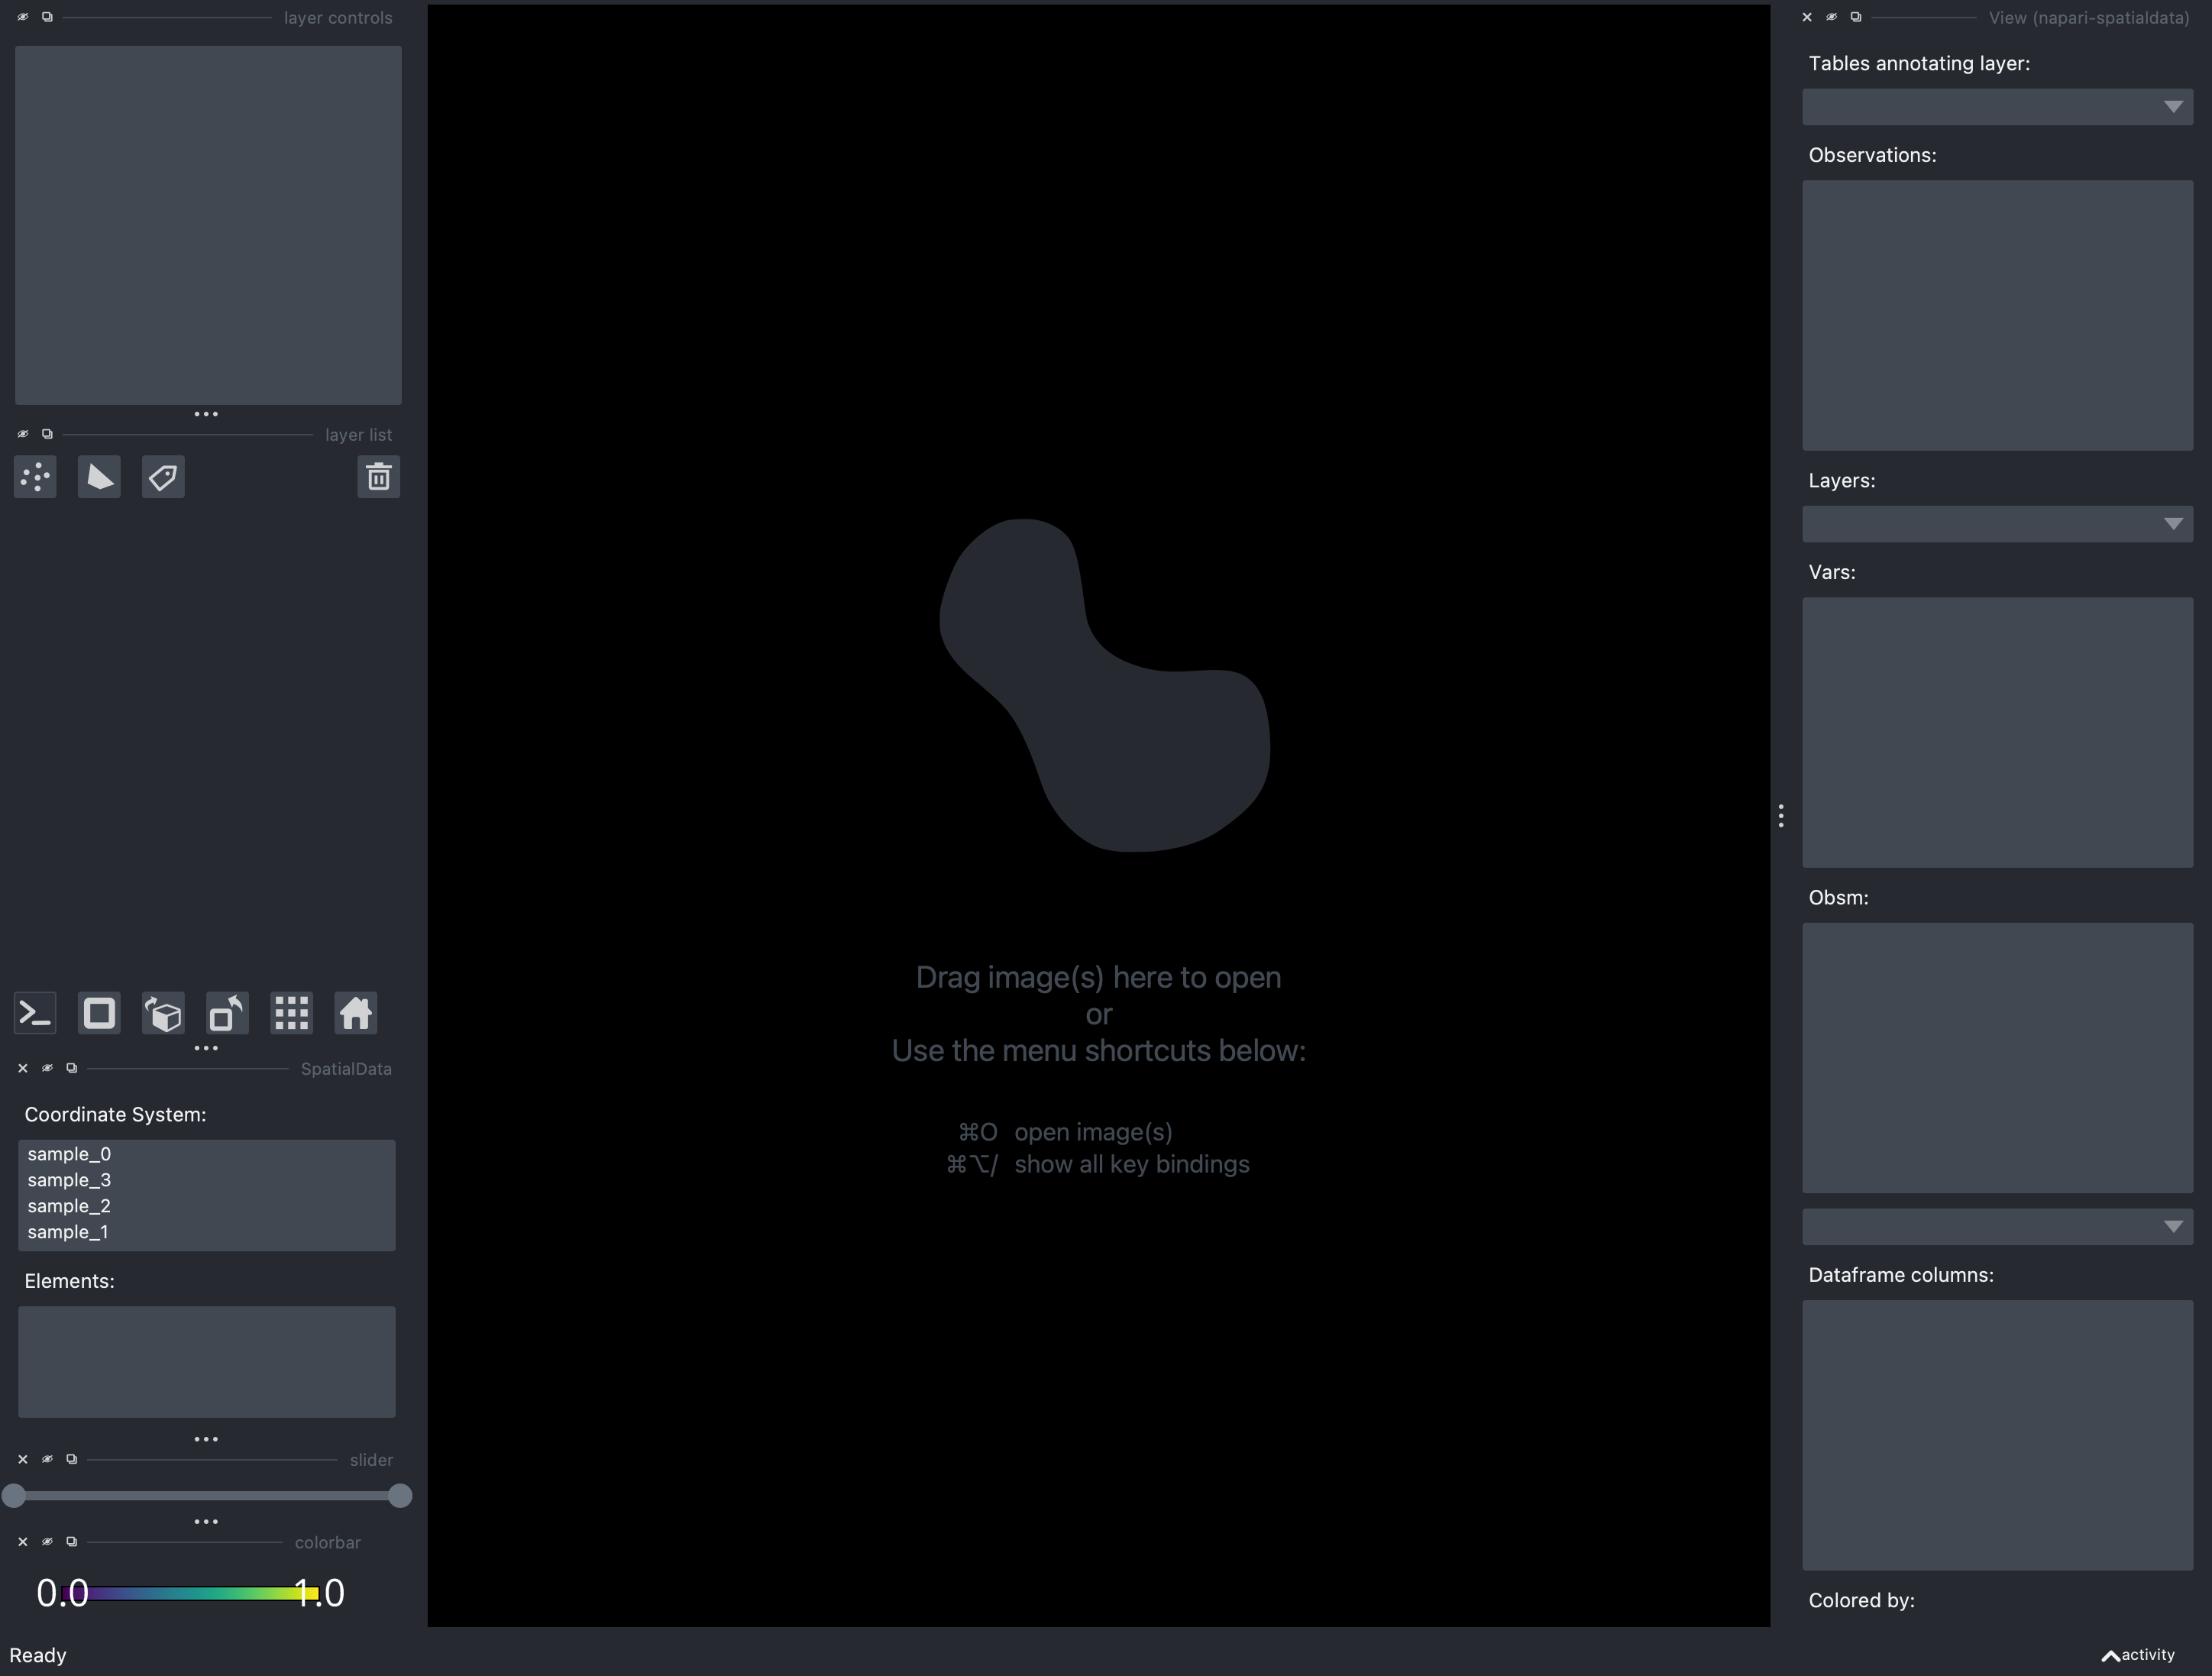

In [5]:
from napari.utils import nbscreenshot

nbscreenshot(i._viewer)

For more advanced interactive visualization, read the napari-spatialdata documentation and our other notebooks.